In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import train_test_split as tts

In [5]:
df=pd.read_csv('salary')

In [6]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.1,39343
1,1,1.3,46205
2,2,1.5,37731
3,3,2.0,43525
4,4,2.2,39891
5,5,2.9,56642
6,6,3.0,60150
7,7,3.2,54445
8,8,3.2,64445
9,9,3.7,57189


In [7]:
del df['Unnamed: 0']

In [8]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
df.duplicated().any()

False

In [56]:
X=df.iloc[:,:1]
Y=df.iloc[:,1:]

In [57]:
Y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [58]:
# no use of scaler

In [59]:
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.2,random_state=0)
xtrain

,YearsExperience
2,1.5
11,4.0
27,9.6
25,9.0
34,13.5
32,12.3
26,9.5
30,11.2
8,3.2
13,4.1


In [61]:
# linear
from  sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
pred1=lr.predict(xtest)


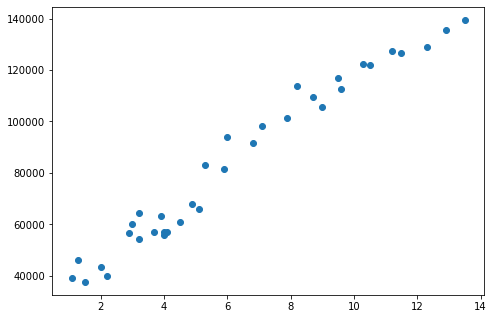

In [62]:
fig=mpl.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['YearsExperience'],df['Salary'])


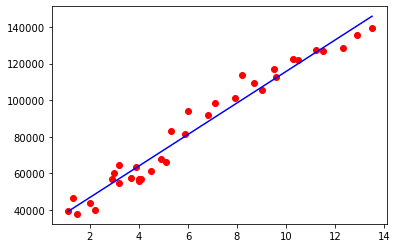

In [63]:
mpl.scatter(X,Y,color='r')
mpl.plot(X,lr.predict(X),color='blue')

In [76]:
from sklearn.preprocessing import PolynomialFeatures # for polynomial fetures
pf=PolynomialFeatures(degree=3)

In [77]:
xpoly=pf.fit_transform(X)

In [78]:
lr.fit(xpoly,Y)
pred2=lr.predict(xpoly)

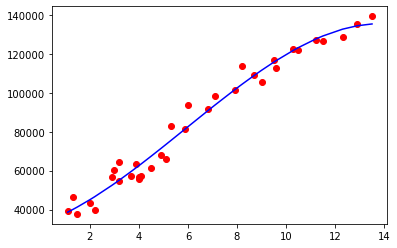

In [79]:
mpl.scatter(X,Y,color='r')
mpl.plot(X,lr.predict(pf.fit_transform(X)),color='blue')

In [80]:
pred2

array([[ 38632.06732743],
       [ 39947.81880498],
       [ 41323.91909998],
       [ 45011.04693038],
       [ 46577.78930629],
       [ 52426.88106507],
       [ 53304.52217043],
       [ 55088.0803344 ],
       [ 55088.0803344 ],
       [ 59696.67526404],
       [ 61593.13345038],
       [ 62551.41742886],
       [ 62551.41742886],
       [ 63515.96913449],
       [ 67430.32028224],
       [ 71418.8232798 ],
       [ 73434.34877616],
       [ 75460.57269966],
       [ 81577.3032486 ],
       [ 82598.87878191],
       [ 90734.4967923 ],
       [ 93746.84279004],
       [101586.04438532],
       [104427.94774158],
       [109011.06884469],
       [111654.53833076],
       [115854.67274812],
       [116660.91259694],
       [121949.61267557],
       [123336.77007291],
       [127703.29502841],
       [129322.4326305 ],
       [132814.0226554 ],
       [134566.413334  ],
       [135497.86422511]])

In [81]:
import joblib
joblib.dump(lr,'Salary')

['Salary']

In [89]:
#GUI predictor
from tkinter import *
import joblib


In [91]:
def show():
    p1=float(e1.get())
    model = joblib.load('Salary')
    fi=model.predict([[p1]])
    Label(master, text=fi).grid(row=31)

    
master = Tk()
master.title("Salary Prediction System")

label = Label(master, text = "Salaary Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master, text=" Years of Experience ").grid(row=1)   
e1 = Entry(master)
e1.grid(row=1, column=1)

Button(master, text='Click Here to Predict salary', command=show).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dell\anaconda31\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\dell\AppData\Local\Temp/ipykernel_5228/947393005.py", line 4, in show
    fi=model.predict([[p1]])
  File "C:\Users\dell\anaconda31\lib\site-packages\sklearn\linear_model\_base.py", line 238, in predict
    return self._decision_function(X)
  File "C:\Users\dell\anaconda31\lib\site-packages\sklearn\linear_model\_base.py", line 221, in _decision_function
    return safe_sparse_dot(X, self.coef_.T,
  File "C:\Users\dell\anaconda31\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\dell\anaconda31\lib\site-packages\sklearn\utils\extmath.py", line 152, in safe_sparse_dot
    ret = a @ b
ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)
